In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_curve, auc)
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.feature_selection import RFE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

Loading the dataset and displaying the first 5 rows

In [ ]:
file_path = '/content/drive/My Drive/DS3000_Group7_FinalProject/heart_2020_cleaned.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Checking for null values in our dataset

In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
boolean_columns = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'PhysicalActivity', 'Asthma',
    'KidneyDisease', 'SkinCancer'
]

boolean_mapping = {
    'Yes': 1,
    'No': 0,
}

gender_mapping = {
    'Female': 0,
    'Male': 1,
}


df[boolean_columns] = df[boolean_columns].replace(boolean_mapping)
df['Sex'] = df['Sex'].replace(gender_mapping)

df[boolean_columns] = df[boolean_columns].astype(int)
df['Sex'] = df['Sex'].astype(int)

<ipython-input-6-b8ec4c14507c>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[boolean_columns] = df[boolean_columns].replace(boolean_mapping)
<ipython-input-6-b8ec4c14507c>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace(gender_mapping)


In [ ]:
df[boolean_columns].dtypes

,0
HeartDisease,int64
Smoking,int64
AlcoholDrinking,int64
Stroke,int64
DiffWalking,int64
PhysicalActivity,int64
Asthma,int64
KidneyDisease,int64
SkinCancer,int64


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


The next bunch of cells is reorganizing columns into numerical categories in order to perform machine learning operations on. For example we are organizing age, race, and general health into seperate categories represented by a single integer.

In [ ]:
df['HasDiabetes'] = 0
df['HasBorderlineDiabetes'] = 0
df['HasGestationalDiabetes'] = 0

df.loc[df['Diabetic'] == 'Yes', 'HasDiabetes'] = 1
df.loc[df['Diabetic'] == 'No, borderline diabetes', 'HasBorderlineDiabetes'] = 1
df.loc[df['Diabetic'] == 'Yes (during pregnancy)', 'HasGestationalDiabetes'] = 1

diabetic_columns = ['HasDiabetes', 'HasBorderlineDiabetes', 'HasGestationalDiabetes']
df[diabetic_columns] = df[diabetic_columns].astype(int)
df = df.drop(columns=['Diabetic'])

In [ ]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
age_category_mapping = {
    '18-24': 1,
    '25-29': 2,
    '30-34': 3,
    '35-39': 4,
    '40-44': 5,
    '45-49': 6,
    '50-54': 7,
    '55-59': 8,
    '60-64': 9,
    '65-69': 10,
    '70-74': 11,
    '75-79': 12,
    '80 or older': 13
}

df['AgeCategory'] = df['AgeCategory'].replace(age_category_mapping)
df['AgeCategory'] = df['AgeCategory'].astype(int)

<ipython-input-11-100ab61def78>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeCategory'] = df['AgeCategory'].replace(age_category_mapping)


In [ ]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [ ]:
gen_health_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

df['GenHealth'] = df['GenHealth'].replace(gen_health_mapping)
df['GenHealth'] = df['GenHealth'].astype(int)

<ipython-input-13-6cfefc1fb572>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GenHealth'] = df['GenHealth'].replace(gen_health_mapping)


In [ ]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
race_dummies = pd.get_dummies(df['Race'], prefix='Race')
race_dummies = race_dummies.astype(int)
df = pd.concat([df, race_dummies], axis=1)
df = df.drop('Race', axis=1)

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SkinCancer,HasDiabetes,HasBorderlineDiabetes,HasGestationalDiabetes,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,8,...,1,1,0,0,0,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,...,0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,10,...,0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,0,12,...,1,0,0,0,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  PhysicalActivity                     319795 non-null  int64  
 11  GenHealth    

In [ ]:
def categorize_bmi(value):
    if value < 18.5:
        return 1
    elif 18.5 <= value < 25:
        return 2
    elif 25 <= value < 30:
        return 3
    else:
        return 4

def categorize_sleep(value):
    if value < 7:
        return 1
    elif 7 <= value <= 9:
        return 2
    else:
        return 3

df['SleepCategory'] = df['SleepTime'].apply(categorize_sleep)
df['BMI_category'] = df['BMI'].apply(categorize_bmi)

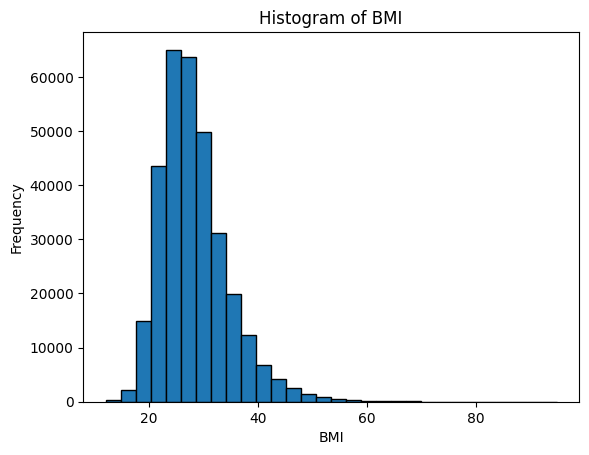

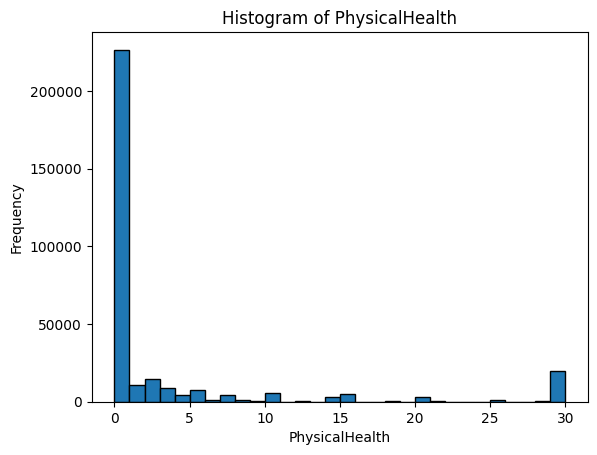

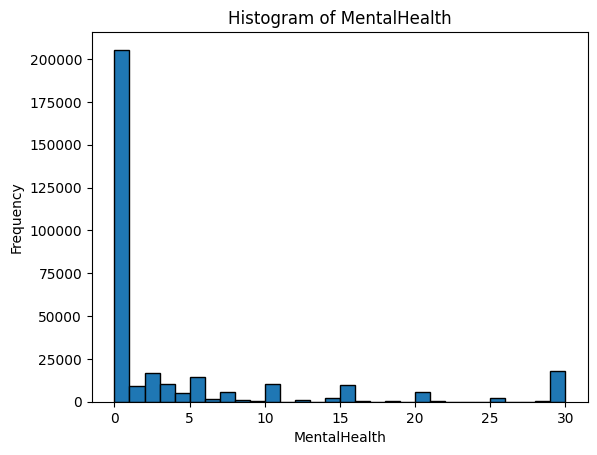

In [ ]:
columns_to_plot = ['BMI', 'PhysicalHealth', 'MentalHealth']

for col in columns_to_plot:
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
scaler = StandardScaler()
df['BMI_scaled'] = scaler.fit_transform(df[['BMI']])
df['PhysicalHealth_log'] = np.log1p(df['PhysicalHealth'])
df['MentalHealth_log'] = np.log1p(df['MentalHealth'])

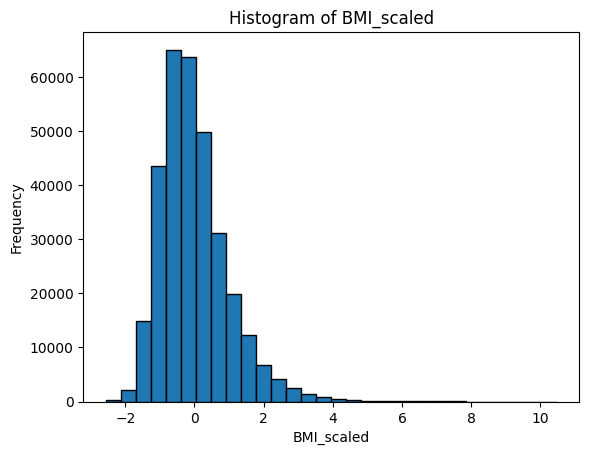

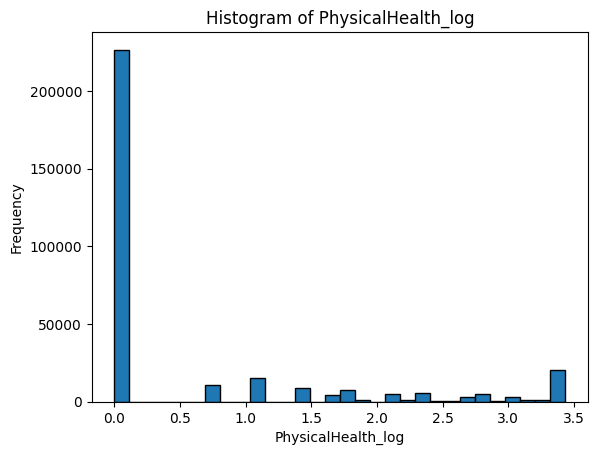

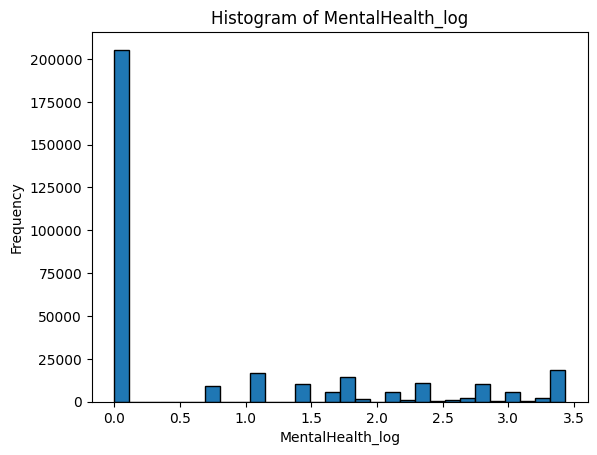

In [ ]:
columns_to_plot_after_scaling = ['BMI_scaled', 'PhysicalHealth_log', 'MentalHealth_log']

for col in columns_to_plot_after_scaling:
    plt.hist(df[col], bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,SleepCategory,BMI_category,BMI_scaled,PhysicalHealth_log,MentalHealth_log
0,0,16.60,1,0,0,3.0,30.0,0,0,8,...,0,0,0,0,1,1,1,-1.844750,1.386294,3.433987
1,0,20.34,0,0,1,0.0,0.0,0,0,13,...,0,0,0,0,1,2,2,-1.256338,0.000000,0.000000
2,0,26.58,1,0,0,20.0,30.0,0,1,10,...,0,0,0,0,1,2,3,-0.274603,3.044522,3.433987
3,0,24.21,0,0,0,0.0,0.0,0,0,12,...,0,0,0,0,1,1,2,-0.647473,0.000000,0.000000
4,0,23.71,0,0,0,28.0,0.0,1,0,5,...,0,0,0,0,1,2,2,-0.726138,3.367296,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  PhysicalActivity                     319795 non-null  int64  
 11  GenHealth    

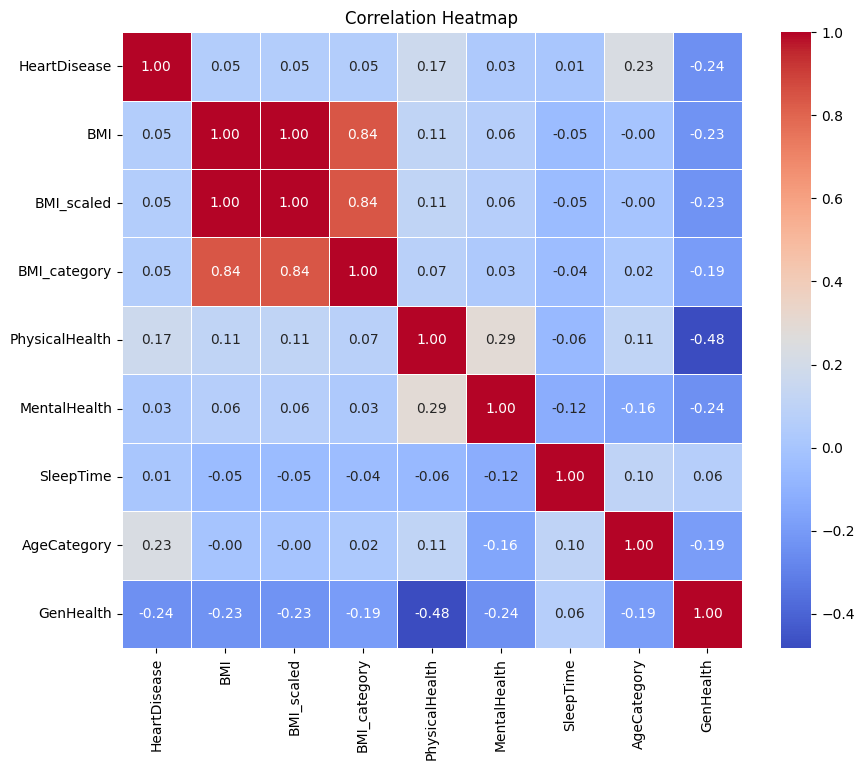

In [ ]:
features = [
    'HeartDisease', 'BMI', 'BMI_scaled', 'BMI_category',
    'PhysicalHealth', 'MentalHealth', 'SleepTime',
    'AgeCategory', 'GenHealth'
]
correlation_matrix = df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
columns_to_view = ['PhysicalHealth', 'MentalHealth', 'PhysicalActivity', 'GenHealth']
df[columns_to_view].head()

,PhysicalHealth,MentalHealth,PhysicalActivity,GenHealth
0,3.0,30.0,1,4
1,0.0,0.0,1,4
2,20.0,30.0,1,2
3,0.0,0.0,0,3
4,28.0,0.0,1,4


In [ ]:
df['SmokesAndDrinks'] = df['Smoking'] & df['AlcoholDrinking']
df['Active_GoodHealth'] = df['PhysicalActivity'] & (df['GenHealth'] >= 3)
df['Active_GoodHealth'] = df['Active_GoodHealth'].astype(int)

In [ ]:
df[['SmokesAndDrinks', 'Active_GoodHealth']].head()

,SmokesAndDrinks,Active_GoodHealth
0,0,1
1,0,1
2,0,0
3,0,0
4,0,1


In [ ]:
chronic_conditions = ['Stroke', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HasDiabetes']
df['ChronicConditionCount'] = df[chronic_conditions].sum(axis=1)
df['ChronicConditionCount'] = df['ChronicConditionCount'].astype(int)

df['BMI_squared'] = df['BMI'] ** 2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   HeartDisease                         319795 non-null  int64  
 1   BMI                                  319795 non-null  float64
 2   Smoking                              319795 non-null  int64  
 3   AlcoholDrinking                      319795 non-null  int64  
 4   Stroke                               319795 non-null  int64  
 5   PhysicalHealth                       319795 non-null  float64
 6   MentalHealth                         319795 non-null  float64
 7   DiffWalking                          319795 non-null  int64  
 8   Sex                                  319795 non-null  int64  
 9   AgeCategory                          319795 non-null  int64  
 10  PhysicalActivity                     319795 non-null  int64  
 11  GenHealth    

In [ ]:
data = df.copy()

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [ ]:
importances = rf.feature_importances_
feature_names = X.columns

In [ ]:
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [ ]:
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)
print("Feature Importances:")
print(feature_importances.head(33))

Feature Importances:
                                Feature  Importance
0                           AgeCategory    0.169875
1                           BMI_squared    0.102570
2                                   BMI    0.102338
3                            BMI_scaled    0.102211
4                             GenHealth    0.076728
5                             SleepTime    0.050930
6                 ChronicConditionCount    0.043759
7                        PhysicalHealth    0.031967
8                    PhysicalHealth_log    0.030729
9                           DiffWalking    0.029968
10                     MentalHealth_log    0.026300
11                         MentalHealth    0.026012
12                                  Sex    0.023712
13                    Active_GoodHealth    0.019442
14                              Smoking    0.019181
15                               Stroke    0.018080
16                          HasDiabetes    0.018059
17                        SleepCategory    

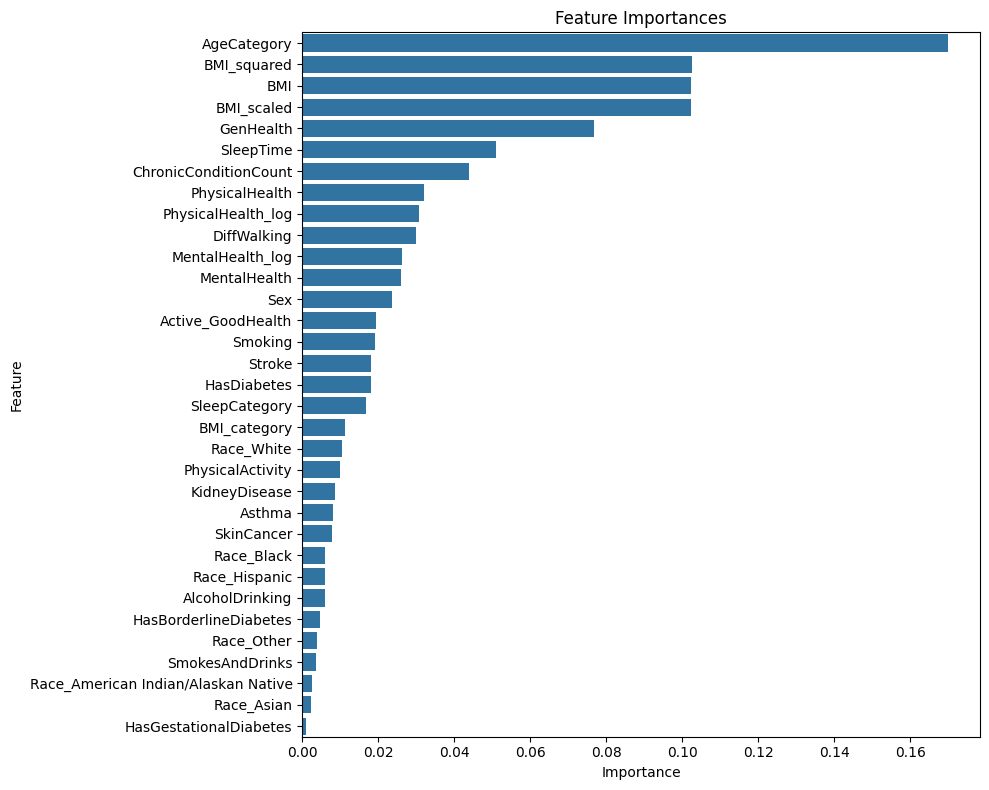

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances.head(33)
)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [ ]:
important_features = ['AgeCategory', 'BMI', 'GenHealth', 'SleepTime', 'ChronicConditionCount', 'PhysicalHealth', 'DiffWalking', 'MentalHealth_log', 'Sex', 'Active_GoodHealth', 'Smoking',
                      'Stroke', 'HasDiabetes','PhysicalActivity', 'KidneyDisease', 'Asthma', 'AlcoholDrinking', 'SkinCancer','Race_American Indian/Alaskan Native',
                      'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']

In [ ]:
final_data = df.copy()
X = final_data[important_features]
y = final_data['HeartDisease']

bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
rf_v1 = RandomForestClassifier(
    n_estimators=50,
    max_depth=7,
    min_samples_split=5,
    min_samples_leaf=4,
    random_state=42,
    class_weight={0:1, 1:5},
    n_jobs=-1
)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
threshold = 0.6

In [ ]:
for train_index, test_index in skf.split(X_train_new, y_train_new):
    X_train_fold, X_valid_fold = X_train_new.iloc[train_index], X_train_new.iloc[test_index]
    y_train_fold, y_valid_fold = y_train_new.iloc[train_index], y_train_new.iloc[test_index]

    rf_v1.fit(X_train_fold, y_train_fold)

    y_proba = rf_v1.predict_proba(X_valid_fold)[:, 1]

    y_pred = (y_proba >= threshold).astype(int)

    accuracy_scores.append(accuracy_score(y_valid_fold, y_pred))
    precision_scores.append(precision_score(y_valid_fold, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_valid_fold, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_valid_fold, y_pred, zero_division=0))

    fpr, tpr, _ = roc_curve(y_valid_fold, y_proba)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

In [ ]:
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(aucs)

In [ ]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Average': [avg_accuracy, avg_precision, avg_recall, avg_f1, avg_auc]
})

print(metrics_df.to_string(index=False))

   Metric  Average
 Accuracy 0.901468
Precision 0.399516
   Recall 0.300529
 F1-score 0.343004
  ROC AUC 0.835764


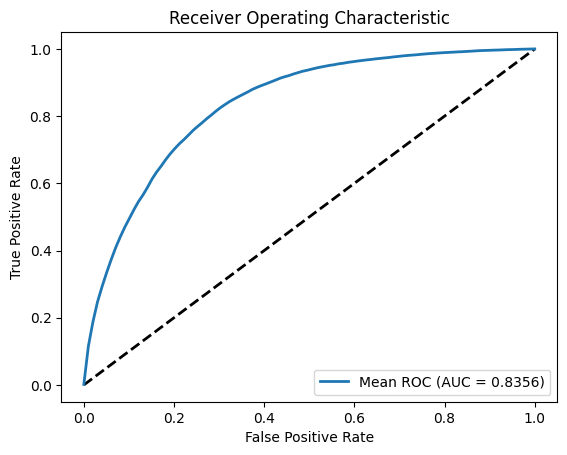

In [ ]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--', lw=2)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label='Mean ROC (AUC = {:.4f})'.format(mean_auc), lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
final_data = df.copy()
X = final_data[important_features]
y = final_data['HeartDisease']

bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

In [ ]:
loss_values = None

fold = 1
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    mlp_model = Sequential([
        Dense(8, activation='tanh', input_shape=(X_train_fold.shape[1],)),
        Dense(8, activation='tanh'),
        Dense(1, activation='sigmoid')
    ])

    mlp_model.compile(optimizer=SGD(learning_rate=0.1),
                      loss=BinaryCrossentropy(),
                      metrics=[])

    history = mlp_model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    if fold == skf.get_n_splits():
        loss_values = history.history['loss']

    y_pred_prob = mlp_model.predict(X_test_fold).flatten()
    y_pred = (y_pred_prob > 0.3).astype(int)

    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))
    precision_scores.append(precision_score(y_test_fold, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_test_fold, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test_fold, y_pred, zero_division=0))

    fpr, tpr, _ = roc_curve(y_test_fold, y_pred_prob)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    fold += 1

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1999/1999 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)
avg_auc = np.mean(aucs)

In [ ]:
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'Average': [avg_accuracy, avg_precision, avg_recall, avg_f1, avg_auc]
})

print(metrics_df.to_string(index=False))

   Metric  Average
 Accuracy 0.893497
Precision 0.362534
   Recall 0.318163
 F1-score 0.336969
  ROC AUC 0.831783


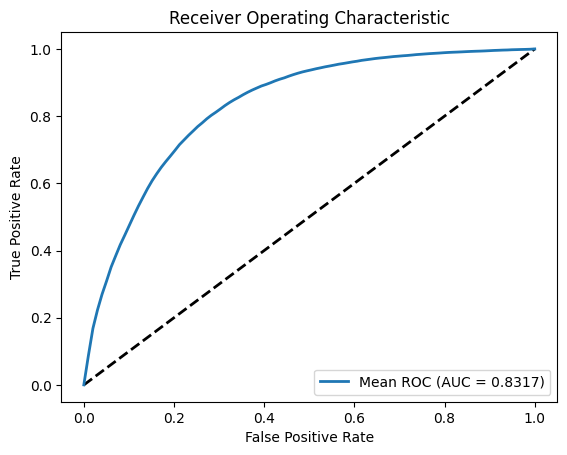

In [ ]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--', lw=2)
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label='Mean ROC (AUC = {:.4f})'.format(mean_auc), lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

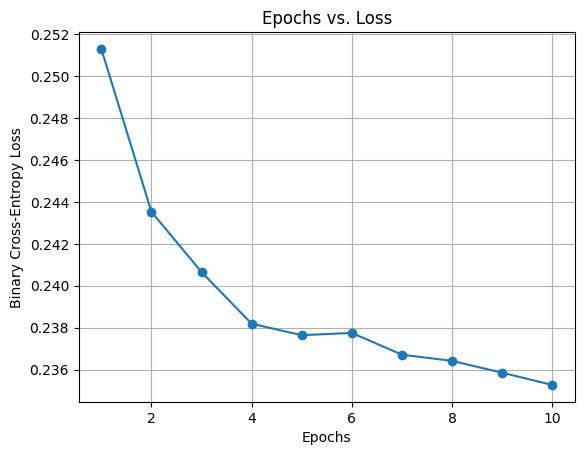

In [ ]:
if loss_values is not None:
    plt.figure()
    plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
    plt.title('Epochs vs. Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Binary Cross-Entropy Loss')
    plt.grid(True)
    plt.show()